In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline

In [2]:
weather = pd.read_csv('day.csv', parse_dates=['dteday'])
weather.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
bike_share = pd.read_csv('2011-Q3-cabi-trip-history-data.csv', parse_dates=['Start date', 'End date'])
bike_share.head()

,Duration,Start date,End date,Start station,End station,Bike#,Member Type
0,0h 15min. 29sec.,2011-09-30 23:59:00,2011-10-01 00:15:00,7th & F St NW / National Portrait Gallery (31232),Eastern Market Metro / Pennsylvania Ave & 7th ...,W00816,Registered
1,0h 5min. 18sec.,2011-09-30 23:59:00,2011-10-01 00:04:00,Eastern Market Metro / Pennsylvania Ave & 7th ...,Lincoln Park / 13th & East Capitol St NE (31619),W00776,Registered
2,0h 8min. 32sec.,2011-09-30 23:58:00,2011-10-01 00:07:00,Florida Ave & R St NW (31503),14th & R St NW (31202),W01099,Registered
3,0h 3min. 44sec.,2011-09-30 23:58:00,2011-10-01 00:02:00,Massachusetts Ave & Dupont Circle NW (31200),21st & M St NW (31212),W00449,Registered
4,0h 5min. 3sec.,2011-09-30 23:58:00,2011-10-01 00:03:00,Massachusetts Ave & Dupont Circle NW (31200),14th & Rhode Island Ave NW (31203),W00078,Registered


In [4]:
bike_share.drop('Bike#', 1, inplace=True)

In [5]:
bike_share['start_date_short'] = pd.to_datetime(bike_share['Start date'].dt.strftime('%Y-%m-%d'))

In [6]:
bike_share['end_date_short'] = pd.to_datetime(bike_share['End date'].dt.strftime('%Y-%m-%d'))

In [7]:
bike_share[['Hours', 'Minutes']] = bike_share['Duration'].str.split(' ', 1, expand=True)
bike_share[['Minutes', 'Seconds']] = bike_share['Minutes'].str.split(' ', 1, expand=True)
bike_share['Hours'] = bike_share['Hours'].str.replace('h', '')
bike_share['Minutes'] = bike_share['Minutes'].str.replace('min.', '')
bike_share['Seconds'] = bike_share['Seconds'].str.replace('sec.', '')
bike_share['Hours'] = bike_share['Hours'].astype(int)
bike_share['Minutes'] = bike_share['Minutes'].astype(int)
bike_share['Seconds'] = bike_share['Seconds'].astype(int)
bike_share['time_diff'] = 60 * bike_share['Hours'] + bike_share['Minutes'] + np.round(bike_share['Seconds']/60, 3)

In [8]:
bike_share.drop('Hours', 1, inplace=True)
bike_share.drop('Minutes', 1, inplace=True)
bike_share.drop('Seconds', 1, inplace=True)

In [9]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404711 entries, 0 to 404710
Data columns (total 9 columns):
Duration            404711 non-null object
Start date          404711 non-null datetime64[ns]
End date            404711 non-null datetime64[ns]
Start station       404711 non-null object
End station         404710 non-null object
Member Type         404711 non-null object
start_date_short    404711 non-null datetime64[ns]
end_date_short      404711 non-null datetime64[ns]
time_diff           404711 non-null float64
dtypes: datetime64[ns](4), float64(1), object(4)
memory usage: 27.8+ MB


In [10]:
weather.drop('instant', 1, inplace=True)

In [11]:
weather.drop('yr', 1, inplace=True)

In [12]:
weather.drop('casual', 1, inplace=True)

In [13]:
weather.drop('registered', 1, inplace=True)

In [14]:
weather.drop('cnt', 1, inplace=True)

In [15]:
merged_data = pd.merge(bike_share, weather, how='left', left_on='start_date_short', right_on='dteday')

In [16]:
merged_data.head()

,Duration,Start date,End date,Start station,End station,Member Type,start_date_short,end_date_short,time_diff,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,0h 15min. 29sec.,2011-09-30 23:59:00,2011-10-01 00:15:00,7th & F St NW / National Portrait Gallery (31232),Eastern Market Metro / Pennsylvania Ave & 7th ...,Registered,2011-09-30,2011-10-01,15.483,2011-09-30,4,9,0,5,1,1,0.564167,0.544829,0.6475,0.206475
1,0h 5min. 18sec.,2011-09-30 23:59:00,2011-10-01 00:04:00,Eastern Market Metro / Pennsylvania Ave & 7th ...,Lincoln Park / 13th & East Capitol St NE (31619),Registered,2011-09-30,2011-10-01,5.300,2011-09-30,4,9,0,5,1,1,0.564167,0.544829,0.6475,0.206475
2,0h 8min. 32sec.,2011-09-30 23:58:00,2011-10-01 00:07:00,Florida Ave & R St NW (31503),14th & R St NW (31202),Registered,2011-09-30,2011-10-01,8.533,2011-09-30,4,9,0,5,1,1,0.564167,0.544829,0.6475,0.206475
3,0h 3min. 44sec.,2011-09-30 23:58:00,2011-10-01 00:02:00,Massachusetts Ave & Dupont Circle NW (31200),21st & M St NW (31212),Registered,2011-09-30,2011-10-01,3.733,2011-09-30,4,9,0,5,1,1,0.564167,0.544829,0.6475,0.206475
4,0h 5min. 3sec.,2011-09-30 23:58:00,2011-10-01 00:03:00,Massachusetts Ave & Dupont Circle NW (31200),14th & Rhode Island Ave NW (31203),Registered,2011-09-30,2011-10-01,5.050,2011-09-30,4,9,0,5,1,1,0.564167,0.544829,0.6475,0.206475


In [17]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404711 entries, 0 to 404710
Data columns (total 20 columns):
Duration            404711 non-null object
Start date          404711 non-null datetime64[ns]
End date            404711 non-null datetime64[ns]
Start station       404711 non-null object
End station         404710 non-null object
Member Type         404711 non-null object
start_date_short    404711 non-null datetime64[ns]
end_date_short      404711 non-null datetime64[ns]
time_diff           404711 non-null float64
dteday              404711 non-null datetime64[ns]
season              404711 non-null int64
mnth                404711 non-null int64
holiday             404711 non-null int64
weekday             404711 non-null int64
workingday          404711 non-null int64
weathersit          404711 non-null int64
temp                404711 non-null float64
atemp               404711 non-null float64
hum                 404711 non-null float64
windspeed           404711 non-nul

In [18]:
merged_data.tail()

,Duration,Start date,End date,Start station,End station,Member Type,start_date_short,end_date_short,time_diff,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
404706,0h 10min. 0sec.,2011-07-01 00:02:00,2011-07-01 00:12:00,5th & F St NW (31620),M St & New Jersey Ave SE (31208),Registered,2011-07-01,2011-07-01,10.000,2011-07-01,3,7,0,5,1,1,0.7225,0.652162,0.39625,0.102608
404707,0h 10min. 1sec.,2011-07-01 00:02:00,2011-07-01 00:12:00,5th & F St NW (31620),M St & New Jersey Ave SE (31208),Registered,2011-07-01,2011-07-01,10.017,2011-07-01,3,7,0,5,1,1,0.7225,0.652162,0.39625,0.102608
404708,0h 16min. 14sec.,2011-07-01 00:02:00,2011-07-01 00:18:00,Massachusetts Ave & Dupont Circle NW (31200),Rosslyn Metro / Wilson Blvd & Ft Myer Dr (31015),Registered,2011-07-01,2011-07-01,16.233,2011-07-01,3,7,0,5,1,1,0.7225,0.652162,0.39625,0.102608
404709,0h 14min. 41sec.,2011-07-01 00:00:00,2011-07-01 00:14:00,Calvert St & Woodley Pl NW (31106),7th & T St NW (31109),Registered,2011-07-01,2011-07-01,14.683,2011-07-01,3,7,0,5,1,1,0.7225,0.652162,0.39625,0.102608
404710,0h 8min. 58sec.,2011-07-01 00:00:00,2011-07-01 00:09:00,21st & I St NW (31205),15th & P St NW (31201),Casual,2011-07-01,2011-07-01,8.967,2011-07-01,3,7,0,5,1,1,0.7225,0.652162,0.39625,0.102608


In [19]:
merged_data.drop('dteday', 1, inplace=True)

In [20]:
merged_data[merged_data['End station'].isnull()]

,Duration,Start date,End date,Start station,End station,Member Type,start_date_short,end_date_short,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
36311,0h 13min. 3sec.,2011-09-22 19:51:00,2011-09-22 20:05:00,13th St & New York Ave NW (31227),NaN,Registered,2011-09-22,2011-09-22,13.05,3,9,0,4,1,2,0.628333,0.554963,0.902083,0.128125


In [21]:
merged_data.dropna(inplace=True)

In [22]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404710 entries, 0 to 404710
Data columns (total 19 columns):
Duration            404710 non-null object
Start date          404710 non-null datetime64[ns]
End date            404710 non-null datetime64[ns]
Start station       404710 non-null object
End station         404710 non-null object
Member Type         404710 non-null object
start_date_short    404710 non-null datetime64[ns]
end_date_short      404710 non-null datetime64[ns]
time_diff           404710 non-null float64
season              404710 non-null int64
mnth                404710 non-null int64
holiday             404710 non-null int64
weekday             404710 non-null int64
workingday          404710 non-null int64
weathersit          404710 non-null int64
temp                404710 non-null float64
atemp               404710 non-null float64
hum                 404710 non-null float64
windspeed           404710 non-null float64
dtypes: datetime64[ns](4), float64(5), in

In [23]:
merged_data[merged_data['End station'].isnull()]

,Duration,Start date,End date,Start station,End station,Member Type,start_date_short,end_date_short,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed


In [24]:
merged_data.describe()

,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,404710.000000,404710.000000,404710.000000,404710.000000,404710.000000,404710.000000,404710.000000,404710.000000,404710.000000,404710.000000,404710.000000
mean,20.988822,3.087628,7.965538,0.023192,3.013533,0.689212,1.316093,0.693272,0.645675,0.653316,0.169004
std,62.426286,0.282754,0.813429,0.150513,2.011227,0.462817,0.498372,0.074735,0.070587,0.130721,0.055054
min,0.000000,3.000000,7.000000,0.000000,0.000000,0.000000,1.000000,0.469167,0.461475,0.396250,0.050379
25%,7.033000,3.000000,7.000000,0.000000,1.000000,0.000000,1.000000,0.649167,0.606067,0.570417,0.130600
50%,11.700000,3.000000,8.000000,0.000000,3.000000,1.000000,1.000000,0.700833,0.648996,0.650417,0.164813
75%,19.500000,3.000000,9.000000,0.000000,5.000000,1.000000,2.000000,0.746667,0.689404,0.742083,0.206467
max,13932.083000,4.000000,9.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.375617


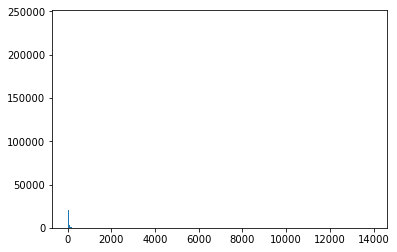

In [25]:
fig, ax = plt.subplots()
ax.hist(merged_data['time_diff'], bins=1000)
plt.show()

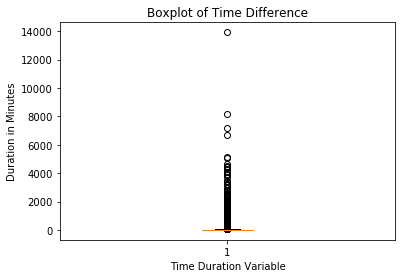

In [26]:
fig, ax = plt.subplots()
ax.boxplot(merged_data['time_diff'])
ax.set_title('Boxplot of Time Difference')
ax.set_ylabel('Duration in Minutes')
ax.set_xlabel('Time Duration Variable')
plt.show()

In [27]:
print(len(merged_data[merged_data['time_diff'] <= 0]))
merged_data = merged_data[merged_data['time_diff'] > 0]

6


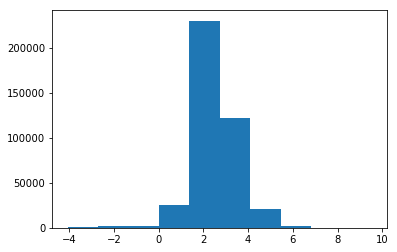

In [28]:
log = np.log(merged_data['time_diff'])

plt.hist(log)
plt.show()

In [29]:
merged_data.to_csv('bikeshare_q3.csv')